In [18]:
import numpy as np
import json
from collections import Counter
import pickle
import matplotlib.pyplot as plt

# Load crawled&normalized data after running crawl_data.py, convert_aff.py
with open("data/pp_authors.txt", "rb") as fp:  # Unpickling
    pp_authors = pickle.load(fp)

unis = json.load(open("data/alias_map.json"))
affi_count = Counter()

new = []
for pp in pp_authors:
    list_aff = []
    for author in pp:
        aff_full = author[author.find("(") + 1 : author.find("')")].lower()
        for aff_nml in unis:
            if aff_full in unis[aff_nml] and aff_nml not in list_aff:
                list_aff.append(aff_nml)

    for aff in list_aff:
        affi_count[aff] += 1

# Hard-coded
affi_count["vinai research"] += 1

academic_prefix = [
    "university",
    "univerisity",
    "institute",
    "uc ",
    "mit",
    "college",
    "telecom paris",
    "chinese academy of sciences",
    "school",
    "lawrence livermore national laboratory",
    "kaist",
    "kaust",
    "ist austria",
    "cnrs",
    "universit\u00e9",
    "irit",
    "inria",
    "college",
    "mila",
    "eth zurich",
    "oxford",
    "cornell",
    "harvard",
    "csiro",
    "tu darmstadt",
    "kth",
    "virginia tech",
    "\u00e9cole polytechnique f\u00e9d\u00e9rale de lausanne",
    "ens",
    "academy",
    "unist",
    "national",
    "yale",
    "universite",
    "universidad",
    "univ.",
    "lmu munich",
    "cuny",
    "tu dresden",
    "technion",
    "postech",
    "telecom sudparis",
]


def is_academic(affi):
    for prefix in academic_prefix:
        if prefix in affi:
            return True
    return False


academic_affi_count = Counter({k: v for k, v in dict(affi_count).items() if is_academic(k)})
industry_affi_count = Counter({k: v for k, v in dict(affi_count).items() if not is_academic(k)})

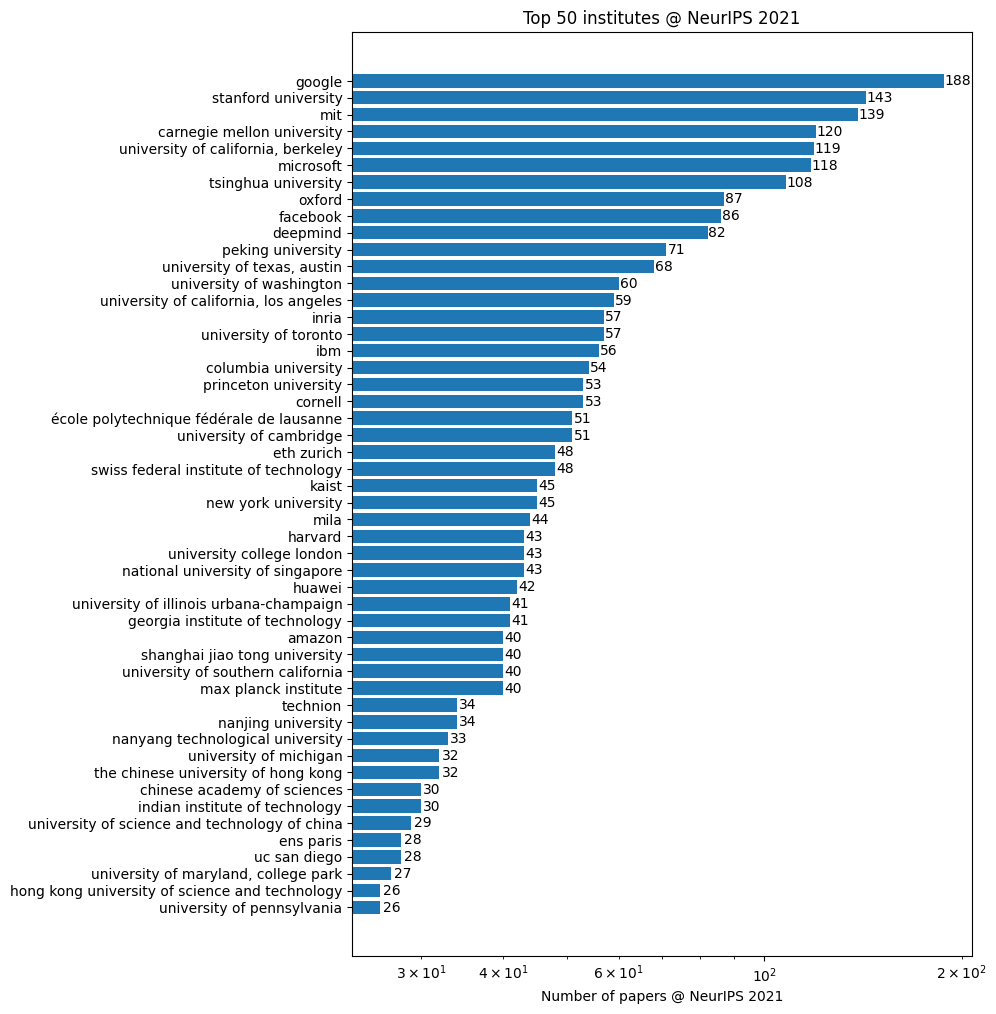

In [19]:
# Show N most common keywords and their frequencies
num_keyowrd = 50
keywords_hist_vis = affi_count.most_common(num_keyowrd)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 12))

key = [k[0] for k in keywords_hist_vis]
value = [k[1] for k in keywords_hist_vis]
y_pos = np.arange(len(key))
ax.barh(y_pos, value, align="center", ecolor="black", log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis()
for i, v in enumerate(value):
    ax.text(v + 0.25, i + 0.25, str(v), color="black", fontsize=10)

ax.set_xlabel("Number of papers @ NeurIPS 2021")
ax.set_title(f"Top {num_keyowrd} institutes @ NeurIPS 2021")
fig.savefig("neurips_stats_top50.png", bbox_inches="tight")
plt.show()

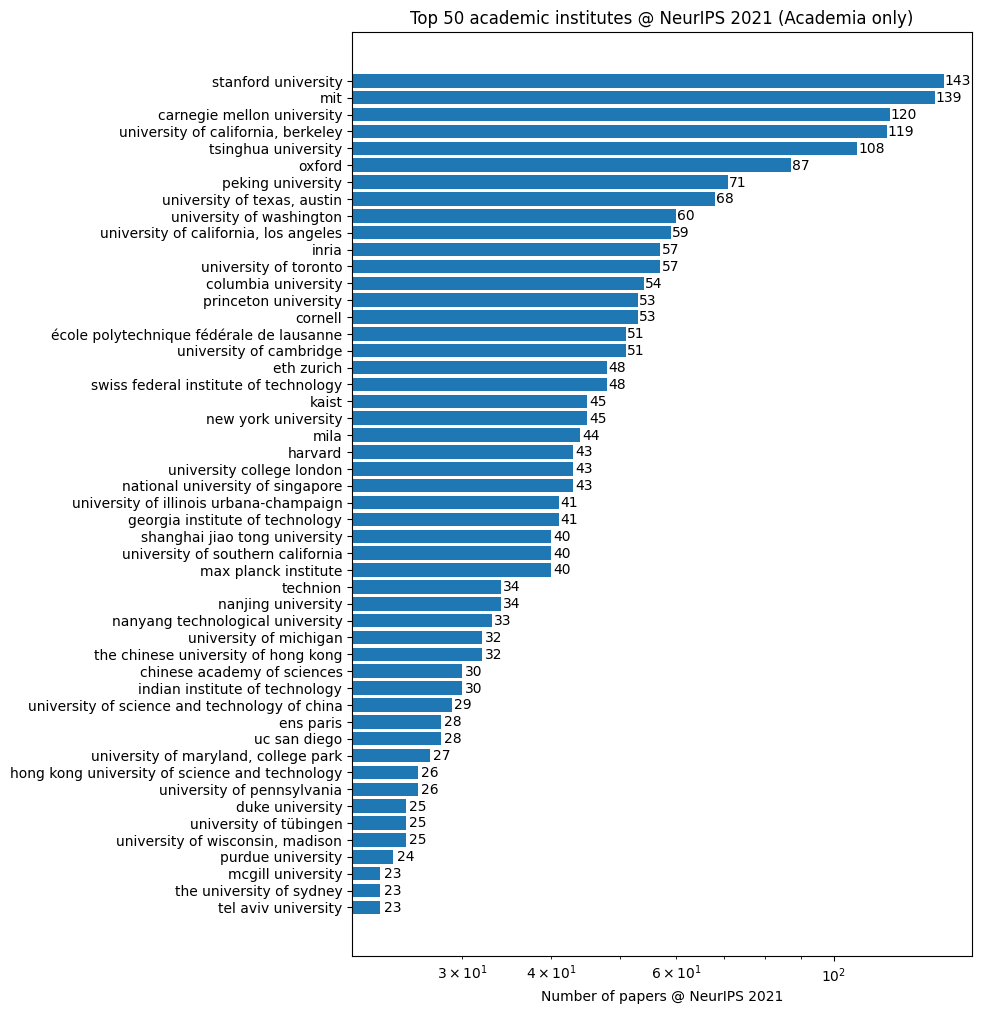

In [20]:
# Show N most common keywords and their frequencies
num_keyowrd = 50
keywords_hist_vis = academic_affi_count.most_common(num_keyowrd)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 12))

key = [k[0] for k in keywords_hist_vis]
value = [k[1] for k in keywords_hist_vis]
y_pos = np.arange(len(key))
ax.barh(y_pos, value, align="center", ecolor="black", log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis()
for i, v in enumerate(value):
    ax.text(v + 0.25, i + 0.25, str(v), color="black", fontsize=10)

ax.set_xlabel("Number of papers @ NeurIPS 2021")
ax.set_title(f"Top {num_keyowrd} academic institutes @ NeurIPS 2021 (Academia only)")
fig.savefig("neurips_stats_top50_academic.png", bbox_inches="tight")
plt.show()

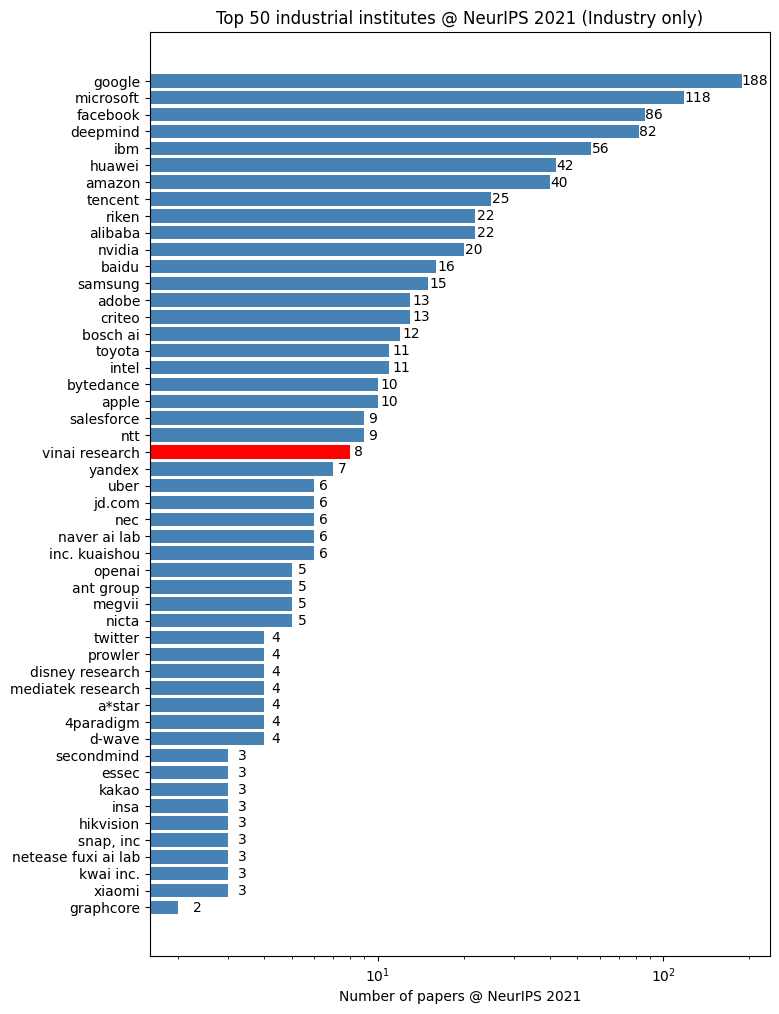

In [21]:
# Show N most common keywords and their frequencies
num_keyowrd = 50
keywords_hist_vis = industry_affi_count.most_common(num_keyowrd)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 12))

key = [k[0] for k in keywords_hist_vis]
value = [k[1] for k in keywords_hist_vis]
y_pos = np.arange(len(key))
colors = []
for place in key:
    if place != "vinai research":
        colors.append("steelblue")
    else:
        colors.append("red")

ax.barh(y_pos, value, align="center", ecolor="black", log=True, color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis()
for i, v in enumerate(value):
    ax.text(v + 0.25, i + 0.25, str(v), color="black", fontsize=10)

ax.set_xlabel("Number of papers @ NeurIPS 2021")
ax.set_title(f"Top {num_keyowrd} industrial institutes @ NeurIPS 2021 (Industry only)")
fig.savefig("neurips_stats_top50_industry.png", bbox_inches="tight")
plt.show()